<a href="https://colab.research.google.com/github/PRIYANSHURANDER12/Mielage-prediction_Regression-Analsis/blob/main/Mielage_prediction_Regression_Analsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Necessary Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Data**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# **Data Preprocessing**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


# **Remove Missing Values**

In [8]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# **Data Visualization**

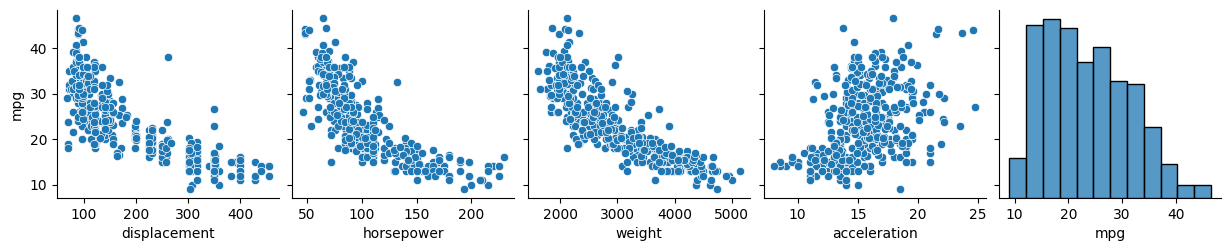

In [9]:
sns.pairplot(df, x_vars = ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars = 'mpg')

<Axes: xlabel='displacement', ylabel='mpg'>

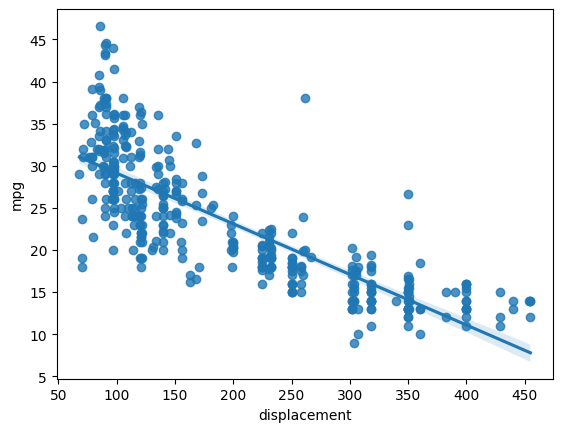

In [10]:
sns.regplot(x = 'displacement', y = 'mpg', data = df)

# **Define Target Variable y and Feature X**

In [11]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [12]:
y = df['mpg']

In [13]:
y.shape

(392,)

In [14]:
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]
x.shape

(392, 4)

# **Scaling Data**

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


# **Train Test Split Data**

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((274, 4), (118, 4), (274,), (118,))

# **Linear Regression Model**

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [18]:
lr.intercept_

23.44532587621475

In [19]:
lr.coef_

array([-0.56879073, -0.86733723, -5.01020886,  0.2942696 ])

**Mileage = 23.6 - 0.13, Displacemet = -1.42, Horsepower = -5.23, Weight = 0.22 Acceleration + error**

# **Predict Test Data**

In [20]:
y_pred = lr.predict(xtest)
y_pred

array([14.26092562, 23.31622511, 28.30215876, 27.50545144, 19.90618175,
       26.38133612,  8.60448786, 29.82344925, 30.74148429, 28.02794171,
       15.81130946, 25.5816216 , 24.04831641, 28.90089312, 30.8508469 ,
       21.5038509 , 24.35879311, 31.94662747, 30.61054885, 25.61925584,
       16.95529518, 26.2584516 , 24.72634721,  9.20147124, 28.20741662,
       23.00702898, 28.56584816, 29.95413084, 12.23718197, 25.65734001,
       26.14312484, 25.13980772, 22.52224638, 31.05141538, 28.84232582,
       27.33749205, 15.8138651 , 27.89760516, 12.36026837, 32.25578149,
       29.37306142, 16.096234  , 31.32712304, 29.24172855, 21.8499039 ,
       14.54655212, 18.89122101, 23.46621335, 28.87033112, 21.29706182,
       24.49925063, 25.31867586, 29.72442505, 27.28970769, 28.50064494,
       17.66335484, 21.59394903, 24.07205959, 18.38706457, 24.78684601,
       19.63301192, 20.5656431 , 24.34481156, 22.37170406, 29.59030539,
       29.26363942, 30.77608716, 28.46332261, 11.87914382, 23.17

# **Model Accuracy**

In [21]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
mean_absolute_error(ytest, y_pred)

3.4985610335731256

In [22]:
mean_absolute_percentage_error(ytest, y_pred)

0.1493672211651674

In [23]:
r2_score(ytest, y_pred)

0.6599548656472692

# **Polynomial Regression**

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)
x_train2 = poly.fit_transform(xtrain)
x_test2 = poly.fit_transform(xtest)
lr.fit(x_train2, ytrain)

LinearRegression()

In [25]:
lr.intercept_

21.475979874733877

In [26]:
lr.coef_

array([-2.15827985, -4.44923951, -2.07583181, -0.48135864,  2.14739574,
        0.41519655,  0.19953321, -0.23934832,  0.04808831,  0.02676234])

In [27]:
y_pred_poly = lr.predict(x_test2)

# **Model Accuracy**

In [28]:
mean_absolute_error(ytest, y_pred_poly)

2.9151539245512192

In [29]:
mean_absolute_percentage_error(ytest, y_pred_poly)

0.11767177646361635

In [30]:
r2_score(ytest, y_pred_poly)

0.7237907299781408